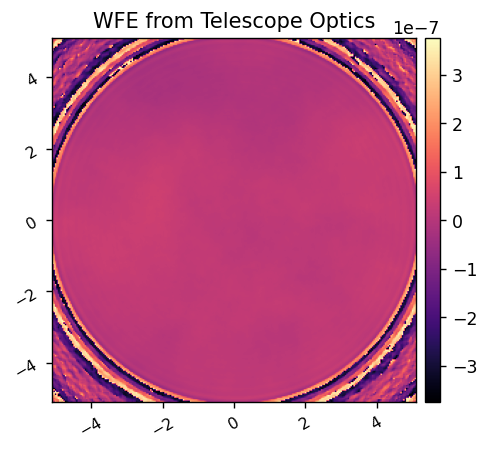

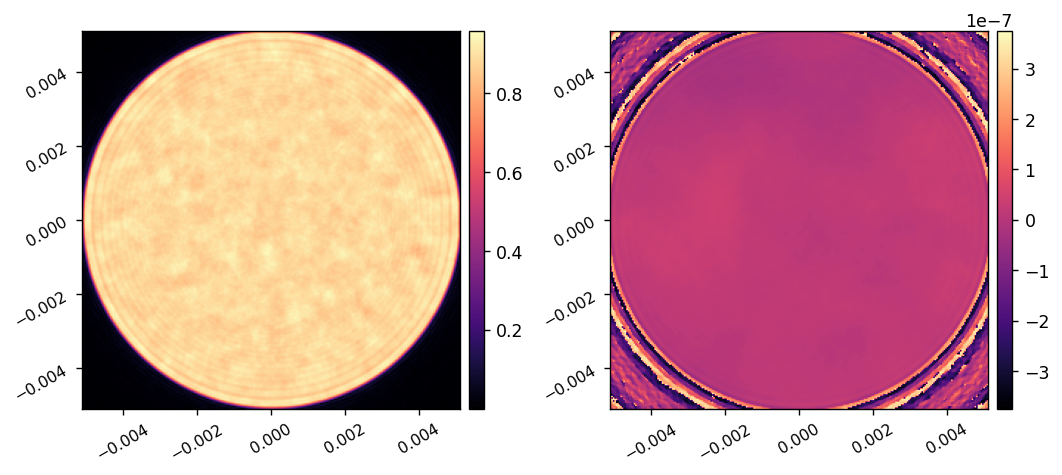

In [8]:
import numpy as np
import cupy as cp
import astropy.units as u
from astropy.io import fits
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload

import poppy

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")

from prop_models import full, compact, agpm
reload(full)
reload(compact)
reload(agpm)

from wfsc_1dm import efc, pwp, utils

import misc_funs as misc

pupil_diam = 10.2*u.mm
wavelength_c = 750e-9*u.m

vortex = agpm.IdealAGPM(name='VVC', wavelength=wavelength_c, charge=6)

lyot_stop_physical = poppy.CircularAperture(name='Lyot Stop', radius=3*u.mm)
lyot_stop_compact = poppy.CircularAperture(name='Lyot Stop', radius=3*u.mm * 500/350)

hdr = fits.getheader('wfe_on_axis.fits')
ote_wfe = poppy.FITSOpticalElement(opd='wfe_on_axis.fits', opdunits='meters',
                                   pixelscale=pupil_diam.to_value(u.m)/hdr['NAXIS1'])
misc.imshow1(wfe.opd, 'WFE from Telescope Optics', pxscl=wfe.pixelscale.to(u.mm/u.pix))


wfe = fits.getdata('pupil-data/post_fpm_pupil_wfe.fits')
wfe_pxscl = fits.getheader('pupil-data/post_fpm_pupil_wfe.fits')['PIXELSCL'] * u.m/u.pix
wfe = poppy.ArrayOpticalElement(transmission=wfe[0]*100*2, 
                                opd=wfe[1]*wavelength_c.to_value(u.m)/(2*np.pi),
                                pixelscale=wfe_pxscl,
                               )

misc.imshow2(wfe.amplitude, wfe.opd, pxscl=wfe.pixelscale)

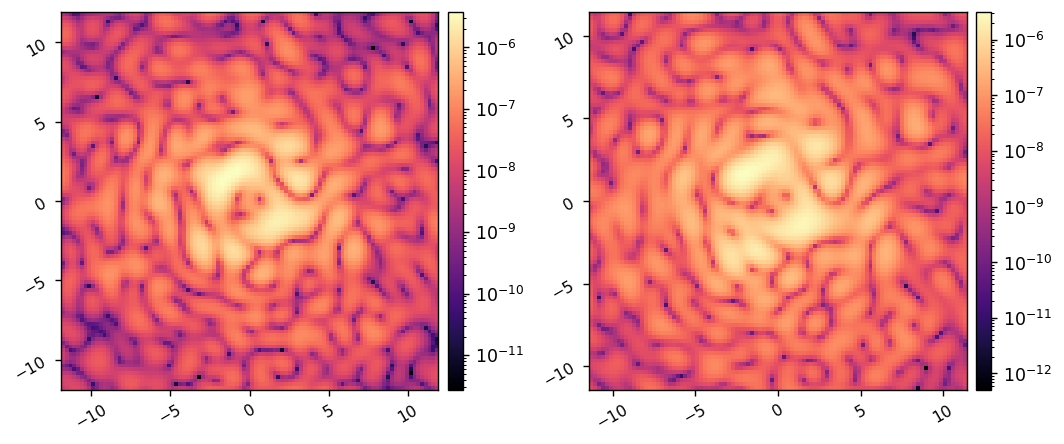

In [9]:
reload(full)
reload(compact)

fc = full.CORO()

fc.npix = 256
fc.oversample = 16
fc.npsf = 100

fc.use_opds = True
fc.OTEWFE = ote_wfe
fc.FPM = vortex
fc.LYOT = lyot_stop_physical

cc = compact.CORO()

cc.npix = 256
cc.oversample = 16
cc.npsf = 100

cc.RETRIEVED = wfe 
cc.FPM = vortex
cc.LYOT = lyot_stop_compact

im_full = fc.snap()

im_comp = cc.snap()

misc.imshow2(im_full, im_comp, 
            lognorm1=True, lognorm2=True,
            pxscl1=fc.psf_pixelscale_lamD, pxscl2=cc.psf_pixelscale_lamD)

In [13]:
reload(full)

fc.FPM = None
ref_im_unocc = fc.snap()

fc.FPM = vortex
ref_im = fc.snap()

misc.imshow2(im_unocc, ref_im, 
             lognorm1=True, lognorm2=True,
             pxscl=fc.psf_pixelscale_lamD, xlabel='$\lambda/D$')

IndexError: Index 0 is out of bounds for axis 0 with size 0

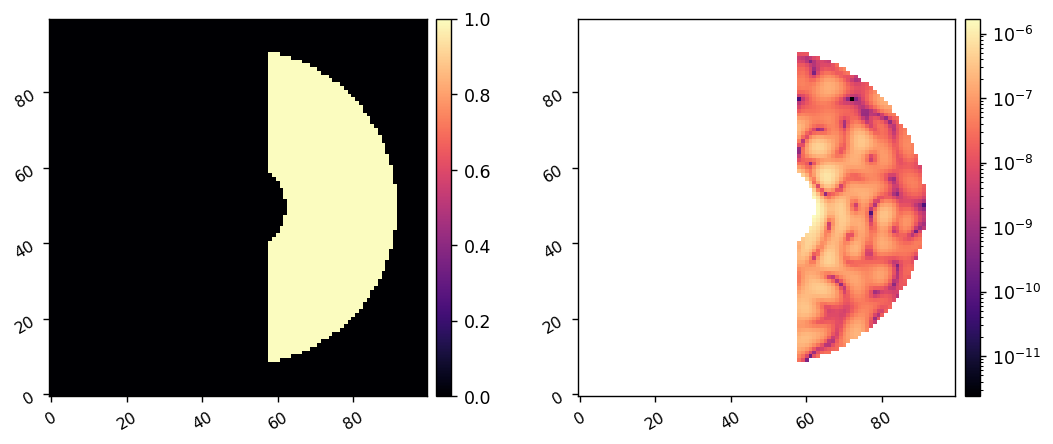

In [4]:
reload(utils)
npsf = c.npsf
nact = c.Nact

xfp = (np.linspace(-npsf/2, npsf/2-1, npsf) + 1/2)*c.psf_pixelscale_lamD
fpx,fpy = np.meshgrid(xfp,xfp)

edge = 2
iwa = 3
owa = 10
rot = 0

# Create the mask that is used to select which region to make dark.
dark_params = {
    'inner_radius' : iwa,
    'outer_radius' : owa,
    'edge_position' : edge,
    'direction' : '+x',
    'rotation':rot,
    'full': False
}
dark_mask = utils.create_annular_focal_plane_mask(fpx, fpy, dark_params)
misc.imshow2(dark_mask, dark_mask*ref_im, lognorm2=True)

misc.save_fits('masks\dark_mask.fits', dark_mask)

In [34]:
reload(efc)

epsilon = 1e-9 # poke amplitudes (DM surface)
jac = efc.build_jacobian(c, epsilon, dark_mask.flatten(), display=False)

Building Jacobian.
	Calculated response for mode 1/952. Elapsed time=1.254 sec.
	Calculated response for mode 2/952. Elapsed time=2.334 sec.
	Calculated response for mode 3/952. Elapsed time=3.414 sec.
	Calculated response for mode 4/952. Elapsed time=4.491 sec.
	Calculated response for mode 5/952. Elapsed time=5.571 sec.
	Calculated response for mode 6/952. Elapsed time=6.656 sec.
	Calculated response for mode 7/952. Elapsed time=7.731 sec.
	Calculated response for mode 8/952. Elapsed time=8.810 sec.
	Calculated response for mode 9/952. Elapsed time=9.893 sec.
	Calculated response for mode 10/952. Elapsed time=10.975 sec.
	Calculated response for mode 11/952. Elapsed time=12.056 sec.
	Calculated response for mode 12/952. Elapsed time=13.150 sec.
	Calculated response for mode 13/952. Elapsed time=14.231 sec.
	Calculated response for mode 14/952. Elapsed time=15.308 sec.
	Calculated response for mode 15/952. Elapsed time=16.385 sec.
	Calculated response for mode 16/952. Elapsed time=17.

	Calculated response for mode 130/952. Elapsed time=146.161 sec.
	Calculated response for mode 131/952. Elapsed time=147.273 sec.
	Calculated response for mode 132/952. Elapsed time=148.387 sec.
	Calculated response for mode 133/952. Elapsed time=149.492 sec.
	Calculated response for mode 134/952. Elapsed time=150.604 sec.
	Calculated response for mode 135/952. Elapsed time=151.715 sec.
	Calculated response for mode 136/952. Elapsed time=152.828 sec.
	Calculated response for mode 137/952. Elapsed time=153.933 sec.
	Calculated response for mode 138/952. Elapsed time=155.042 sec.
	Calculated response for mode 139/952. Elapsed time=156.147 sec.
	Calculated response for mode 140/952. Elapsed time=157.257 sec.
	Calculated response for mode 141/952. Elapsed time=158.364 sec.
	Calculated response for mode 142/952. Elapsed time=159.474 sec.
	Calculated response for mode 143/952. Elapsed time=160.582 sec.
	Calculated response for mode 144/952. Elapsed time=161.689 sec.
	Calculated response for 

	Calculated response for mode 257/952. Elapsed time=287.061 sec.
	Calculated response for mode 258/952. Elapsed time=288.169 sec.
	Calculated response for mode 259/952. Elapsed time=289.280 sec.
	Calculated response for mode 260/952. Elapsed time=290.394 sec.
	Calculated response for mode 261/952. Elapsed time=291.503 sec.
	Calculated response for mode 262/952. Elapsed time=292.616 sec.
	Calculated response for mode 263/952. Elapsed time=293.729 sec.
	Calculated response for mode 264/952. Elapsed time=294.842 sec.
	Calculated response for mode 265/952. Elapsed time=295.949 sec.
	Calculated response for mode 266/952. Elapsed time=297.060 sec.
	Calculated response for mode 267/952. Elapsed time=298.169 sec.
	Calculated response for mode 268/952. Elapsed time=299.279 sec.
	Calculated response for mode 269/952. Elapsed time=300.388 sec.
	Calculated response for mode 270/952. Elapsed time=301.495 sec.
	Calculated response for mode 271/952. Elapsed time=302.601 sec.
	Calculated response for 

	Calculated response for mode 384/952. Elapsed time=428.409 sec.
	Calculated response for mode 385/952. Elapsed time=429.515 sec.
	Calculated response for mode 386/952. Elapsed time=430.625 sec.
	Calculated response for mode 387/952. Elapsed time=431.733 sec.
	Calculated response for mode 388/952. Elapsed time=432.841 sec.
	Calculated response for mode 389/952. Elapsed time=433.948 sec.
	Calculated response for mode 390/952. Elapsed time=435.057 sec.
	Calculated response for mode 391/952. Elapsed time=436.165 sec.
	Calculated response for mode 392/952. Elapsed time=437.274 sec.
	Calculated response for mode 393/952. Elapsed time=438.385 sec.
	Calculated response for mode 394/952. Elapsed time=439.490 sec.
	Calculated response for mode 395/952. Elapsed time=440.600 sec.
	Calculated response for mode 396/952. Elapsed time=441.717 sec.
	Calculated response for mode 397/952. Elapsed time=442.835 sec.
	Calculated response for mode 398/952. Elapsed time=443.950 sec.
	Calculated response for 

	Calculated response for mode 511/952. Elapsed time=569.128 sec.
	Calculated response for mode 512/952. Elapsed time=570.241 sec.
	Calculated response for mode 513/952. Elapsed time=571.345 sec.
	Calculated response for mode 514/952. Elapsed time=572.456 sec.
	Calculated response for mode 515/952. Elapsed time=573.576 sec.
	Calculated response for mode 516/952. Elapsed time=574.690 sec.
	Calculated response for mode 517/952. Elapsed time=575.812 sec.
	Calculated response for mode 518/952. Elapsed time=576.932 sec.
	Calculated response for mode 519/952. Elapsed time=578.047 sec.
	Calculated response for mode 520/952. Elapsed time=579.151 sec.
	Calculated response for mode 521/952. Elapsed time=580.261 sec.
	Calculated response for mode 522/952. Elapsed time=581.369 sec.
	Calculated response for mode 523/952. Elapsed time=582.477 sec.
	Calculated response for mode 524/952. Elapsed time=583.586 sec.
	Calculated response for mode 525/952. Elapsed time=584.693 sec.
	Calculated response for 

	Calculated response for mode 638/952. Elapsed time=711.729 sec.
	Calculated response for mode 639/952. Elapsed time=712.811 sec.
	Calculated response for mode 640/952. Elapsed time=713.898 sec.
	Calculated response for mode 641/952. Elapsed time=714.984 sec.
	Calculated response for mode 642/952. Elapsed time=716.071 sec.
	Calculated response for mode 643/952. Elapsed time=717.153 sec.
	Calculated response for mode 644/952. Elapsed time=718.237 sec.
	Calculated response for mode 645/952. Elapsed time=719.321 sec.
	Calculated response for mode 646/952. Elapsed time=720.433 sec.
	Calculated response for mode 647/952. Elapsed time=721.525 sec.
	Calculated response for mode 648/952. Elapsed time=722.632 sec.
	Calculated response for mode 649/952. Elapsed time=723.719 sec.
	Calculated response for mode 650/952. Elapsed time=724.800 sec.
	Calculated response for mode 651/952. Elapsed time=725.884 sec.
	Calculated response for mode 652/952. Elapsed time=726.967 sec.
	Calculated response for 

	Calculated response for mode 765/952. Elapsed time=851.092 sec.
	Calculated response for mode 766/952. Elapsed time=852.176 sec.
	Calculated response for mode 767/952. Elapsed time=853.262 sec.
	Calculated response for mode 768/952. Elapsed time=854.344 sec.
	Calculated response for mode 769/952. Elapsed time=855.462 sec.
	Calculated response for mode 770/952. Elapsed time=856.547 sec.
	Calculated response for mode 771/952. Elapsed time=857.633 sec.
	Calculated response for mode 772/952. Elapsed time=858.718 sec.
	Calculated response for mode 773/952. Elapsed time=859.801 sec.
	Calculated response for mode 774/952. Elapsed time=860.884 sec.
	Calculated response for mode 775/952. Elapsed time=861.969 sec.
	Calculated response for mode 776/952. Elapsed time=863.056 sec.
	Calculated response for mode 777/952. Elapsed time=864.137 sec.
	Calculated response for mode 778/952. Elapsed time=865.217 sec.
	Calculated response for mode 779/952. Elapsed time=866.308 sec.
	Calculated response for 

	Calculated response for mode 892/952. Elapsed time=989.326 sec.
	Calculated response for mode 893/952. Elapsed time=990.403 sec.
	Calculated response for mode 894/952. Elapsed time=991.482 sec.
	Calculated response for mode 895/952. Elapsed time=992.572 sec.
	Calculated response for mode 896/952. Elapsed time=993.652 sec.
	Calculated response for mode 897/952. Elapsed time=994.729 sec.
	Calculated response for mode 898/952. Elapsed time=995.810 sec.
	Calculated response for mode 899/952. Elapsed time=996.892 sec.
	Calculated response for mode 900/952. Elapsed time=997.970 sec.
	Calculated response for mode 901/952. Elapsed time=999.054 sec.
	Calculated response for mode 902/952. Elapsed time=1000.137 sec.
	Calculated response for mode 903/952. Elapsed time=1001.217 sec.
	Calculated response for mode 904/952. Elapsed time=1002.309 sec.
	Calculated response for mode 905/952. Elapsed time=1003.416 sec.
	Calculated response for mode 906/952. Elapsed time=1004.521 sec.
	Calculated response

In [35]:
misc.save_fits('jacobians\jacobian_20230314.fits', jac, header={'NACTS':952, 'NMASK':2042})

Saved data to:  jacobians\jacobian_20230314.fits


In [38]:
jac = fits.getdata('jacobians\jacobian_20230314.fits')
print(jac.shape, jac.size)

(4084, 952) 3887968


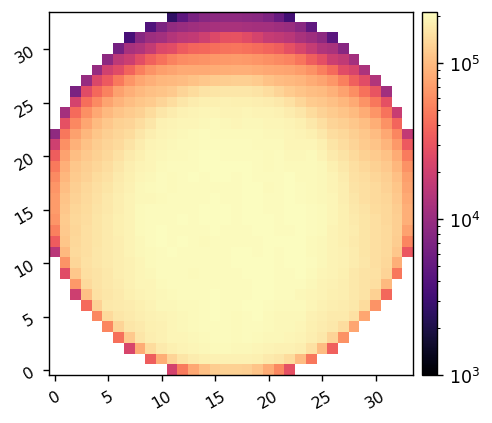

In [39]:
reload(utils)
response = utils.map_acts_to_dm(np.sqrt(((jac)**2).sum(axis=0)), c.dm_mask)
misc.imshow1(response, lognorm=True, vmin=1e3)

In [40]:
reload(utils)
reg_fun = utils.beta_reg
reg_conds = np.array([[0, 20, 25, 35, 40],
                      [-2, -4, -2, -3, -2]])

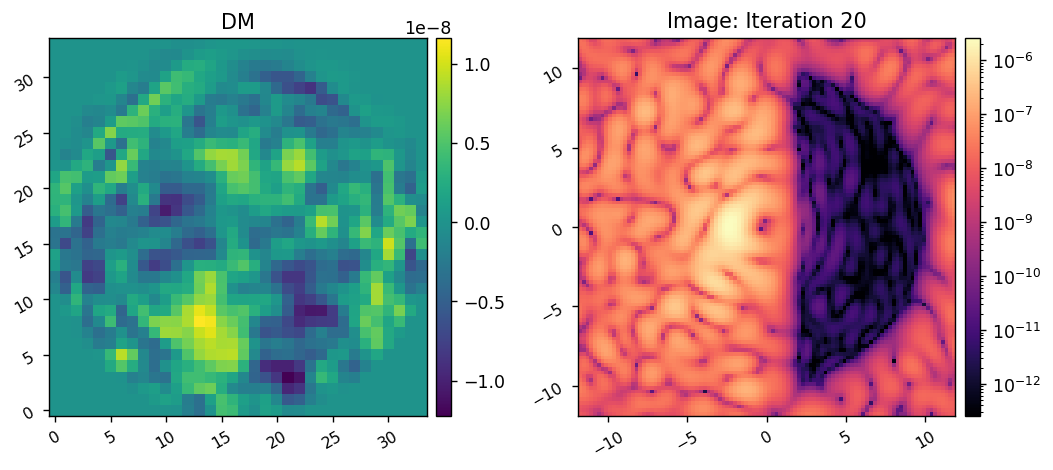

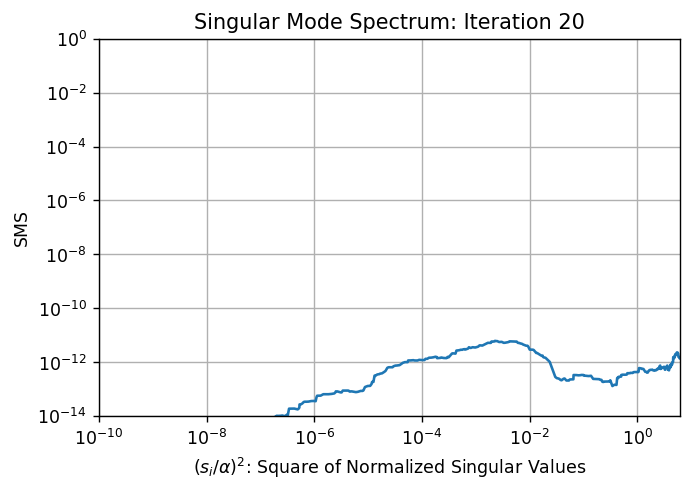

EFC completed in 24.703 sec.


In [41]:
reload(efc)
reload(utils)
c.reset_dm()
commands, efields = efc.run_efc_perfect(c,
                                         jac,
                                         reg_fun,
                                         reg_conds,
                                         dark_mask, 
                                         im_unocc.max(),
                                         iterations=20, 
                                         display_current=True, 
#                                           display_all=True,
                                         plot_sms=True)

Generating probe with amplitude=5.000e-08, radius=14.0, phase=0.000, offset=(0.0,0.0), with discontinuity along x axis.
Generating probe with amplitude=5.000e-08, radius=14.0, phase=1.571, offset=(0.0,0.0), with discontinuity along y axis.


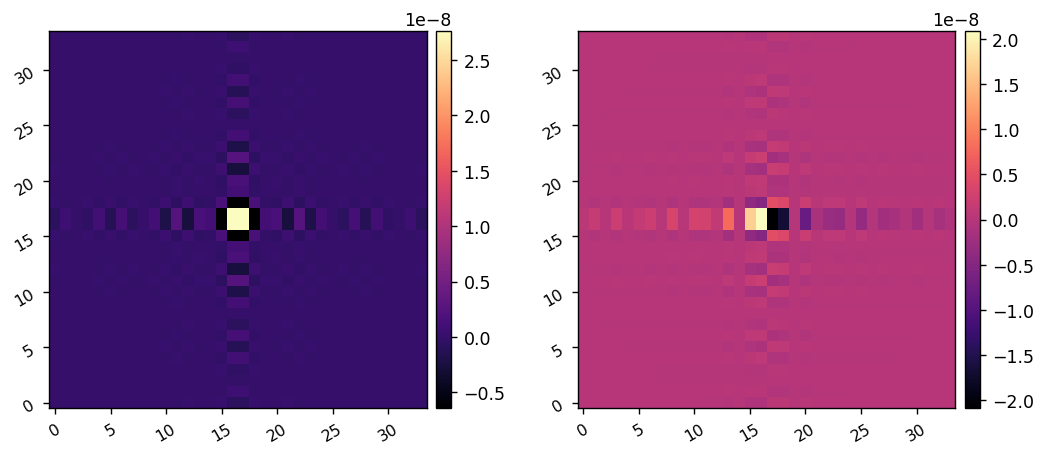

In [42]:
reload(pwp)
Npairs = 2

probe_amp = 5e-8
probe_radius = 14
probe_offset = (0,0)

probes = pwp.create_sinc_probes(Npairs, c.Nact, c.dm_mask, probe_amp, probe_radius, probe_offset, display=True)

pwp_fun = pwp.run_pwp_bp
pwp_kwargs = {'probes':probes, 'use':'j', 'jacobian':jac/2, 
              'display':False, 'display_probe_field':False}

reload(utils)
reg_fun = utils.beta_reg
reg_conds = np.array([[0],
                      [-2]]) 

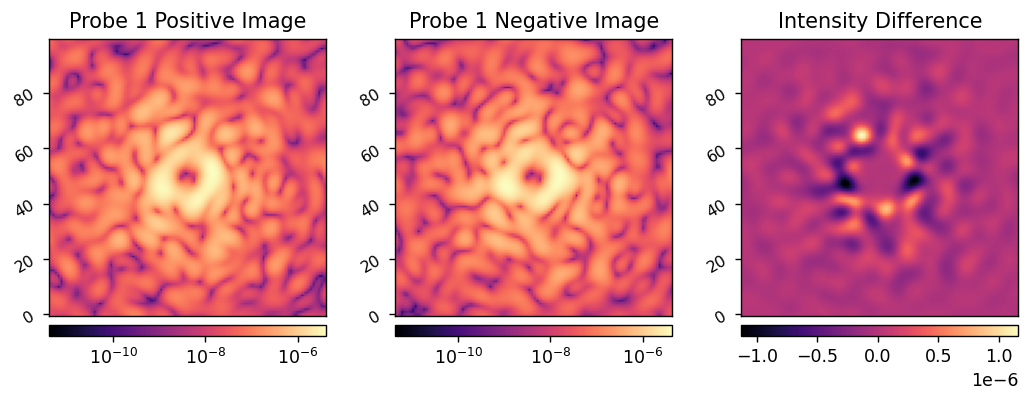

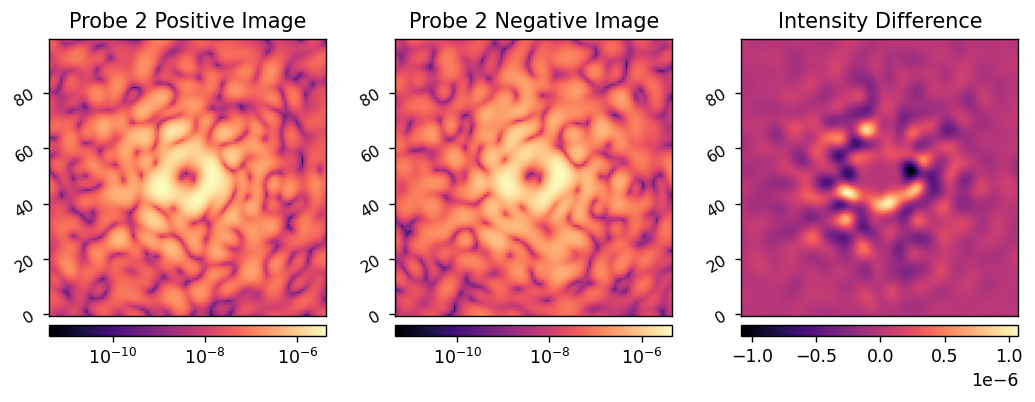

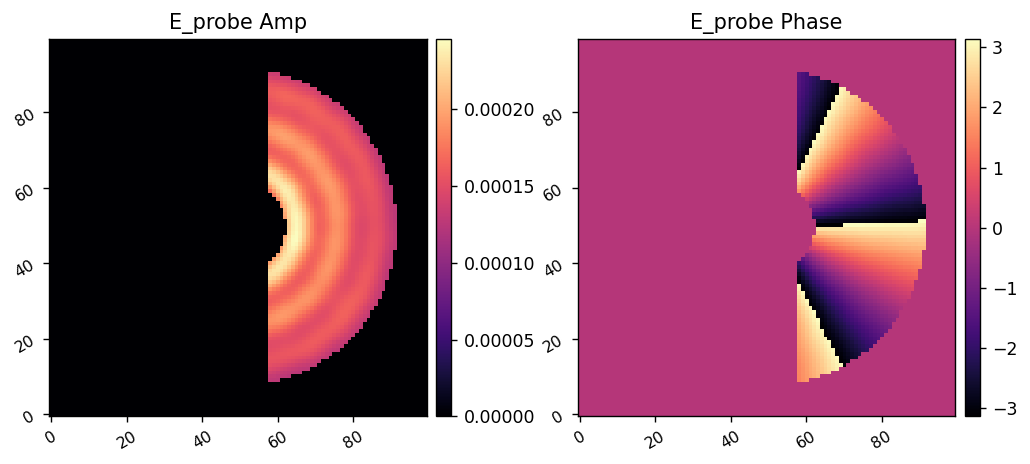

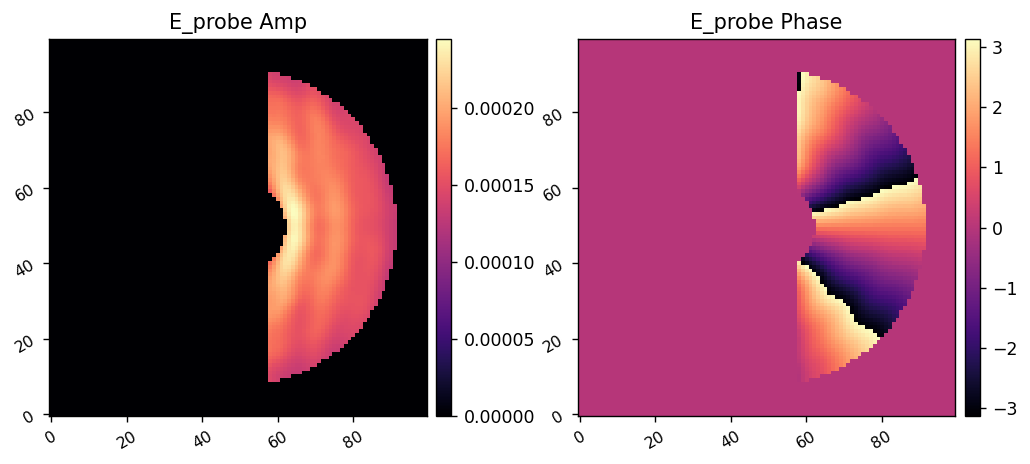

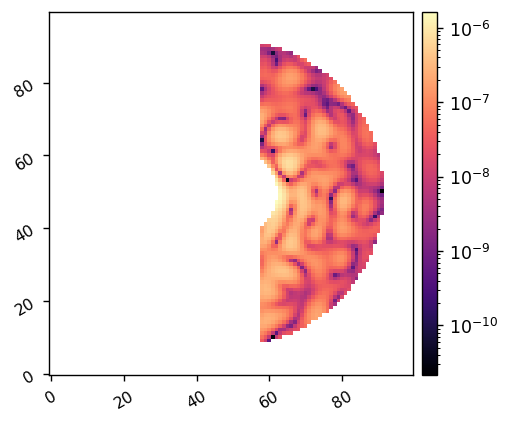

In [44]:
c.reset_dm()
E_est = pwp.run_pwp_bp(c, dark_mask, probes, use='j', jacobian=jac/2, display=True, display_probe_field=True)
misc.imshow1(np.abs(E_est)**2, lognorm=True)

Beginning closed-loop EFC simulation.
Max singular value squared:	 280527754019.9356
alpha^2:			 45184838976.50499
	Running iteration 0/20.
	Computing EFC matrix via beta_reg with condition value -2.00e+00


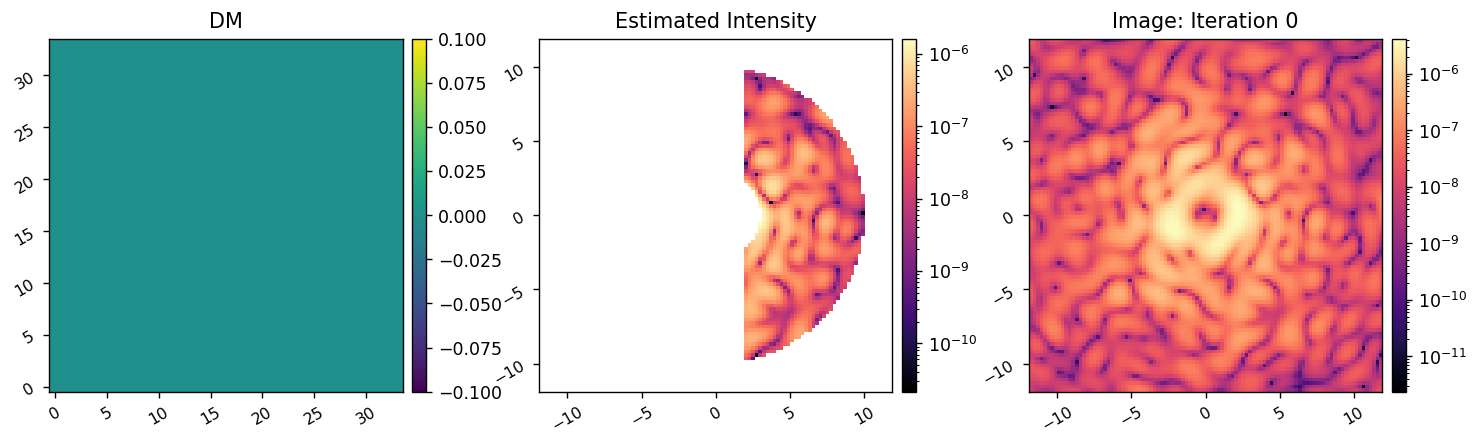

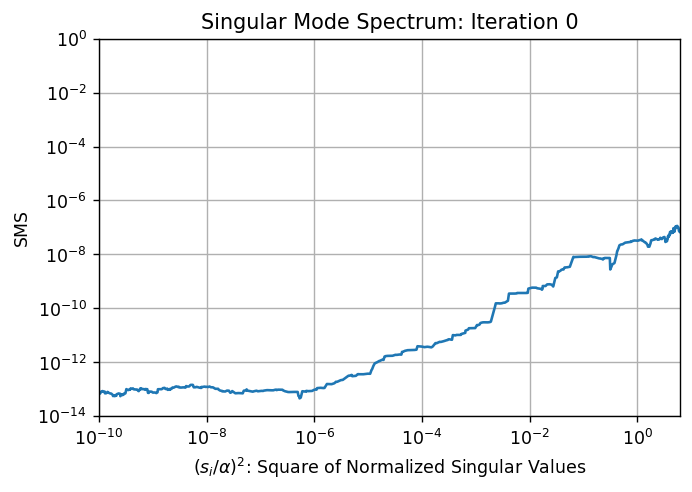

	Running iteration 1/20.


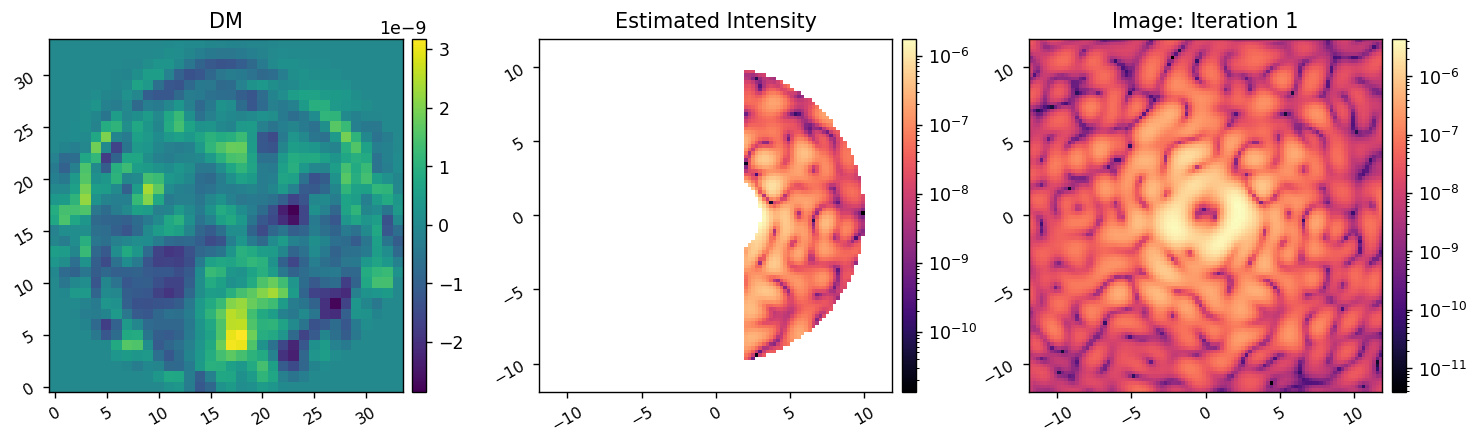

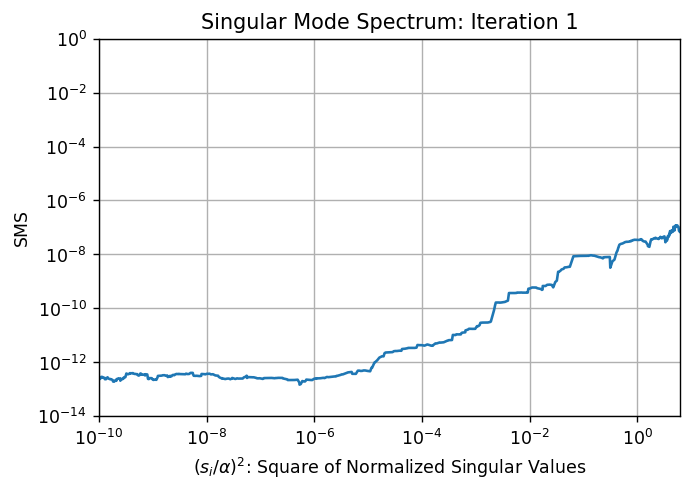

	Running iteration 2/20.


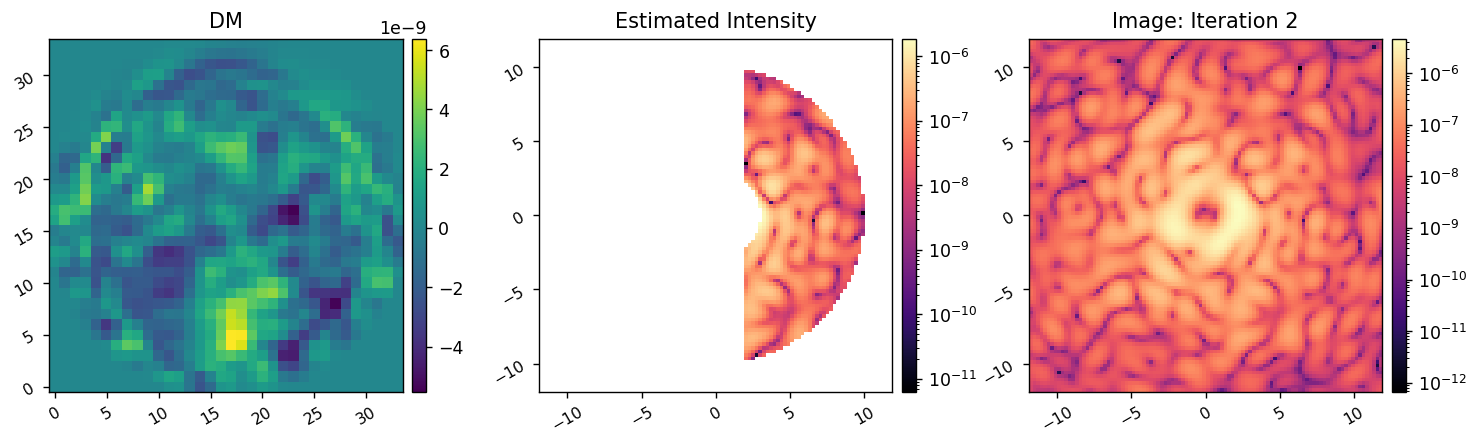

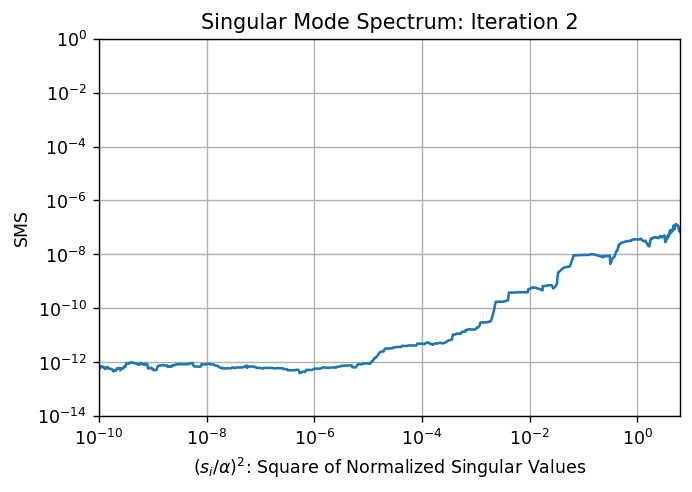

	Running iteration 3/20.


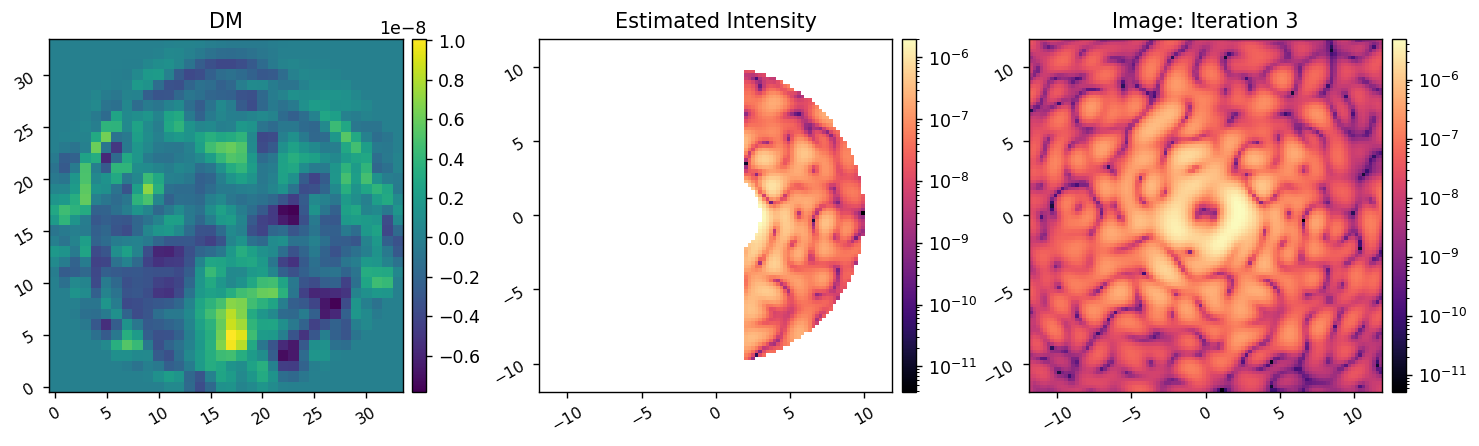

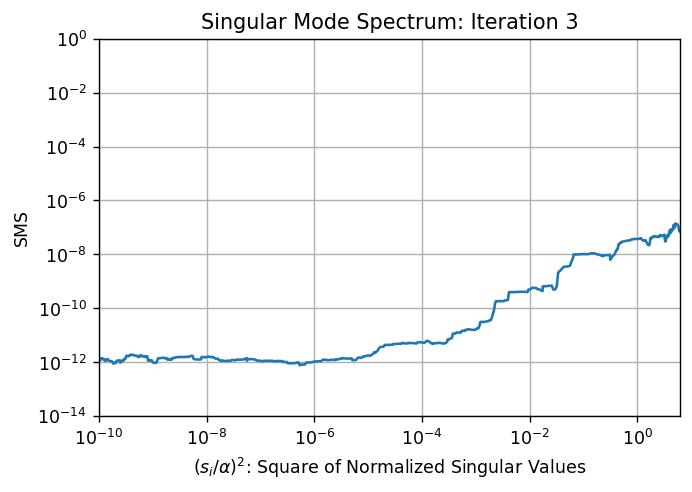

	Running iteration 4/20.


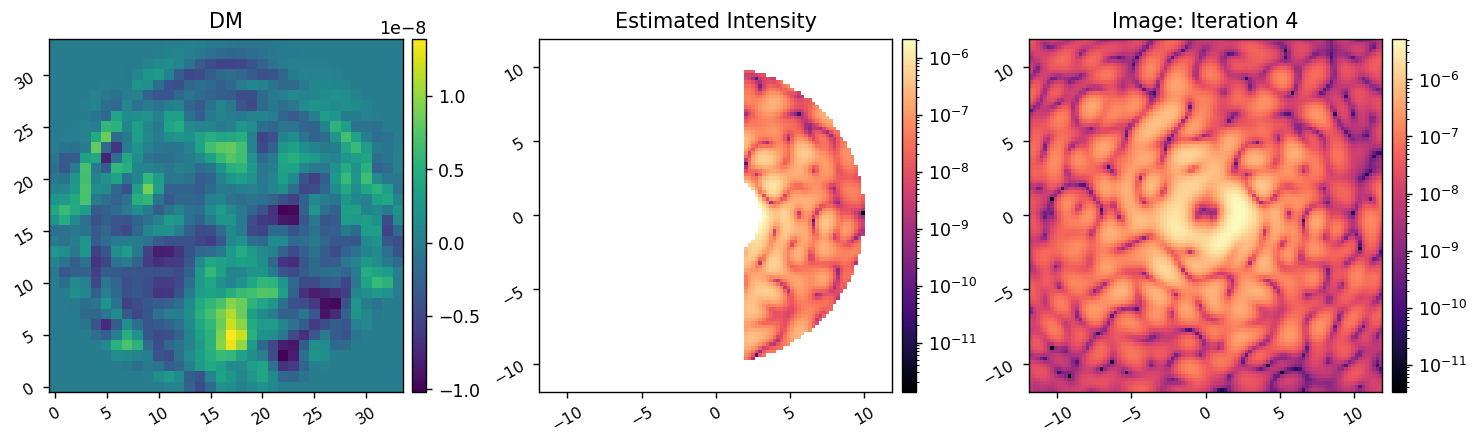

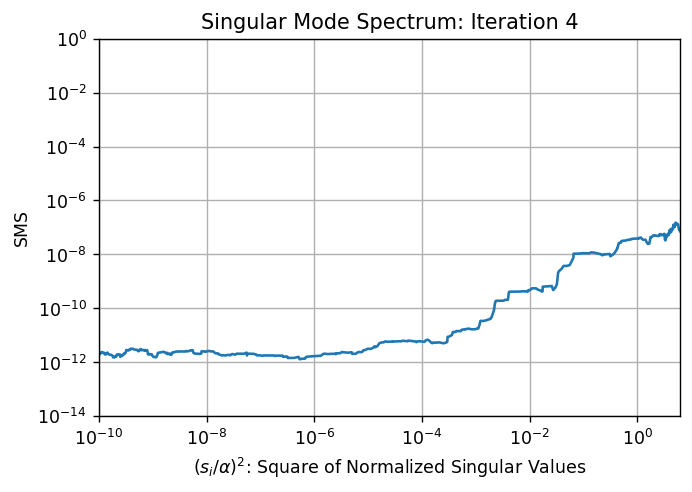

	Running iteration 5/20.


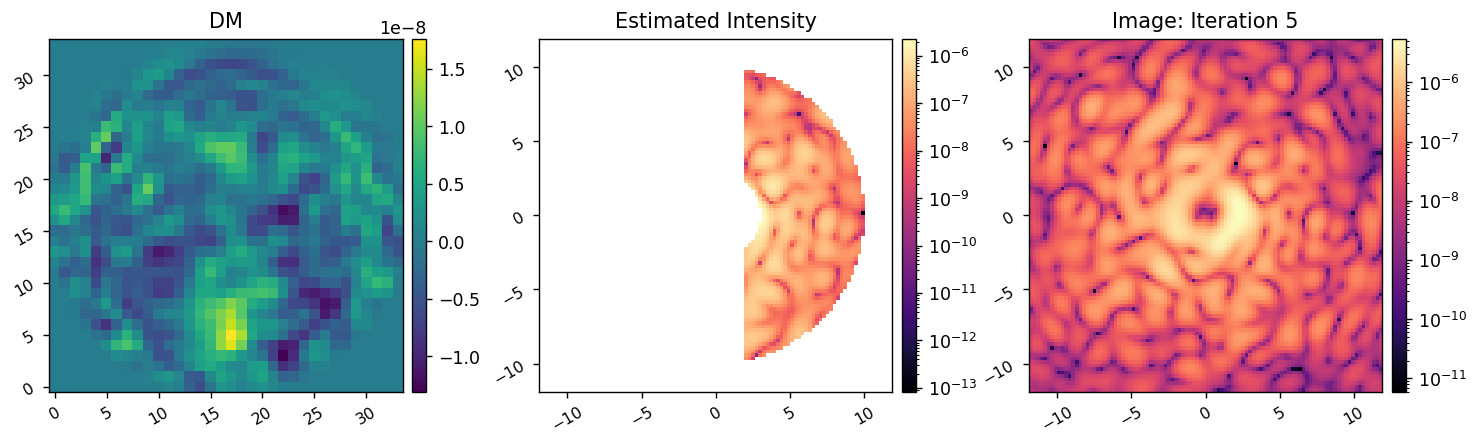

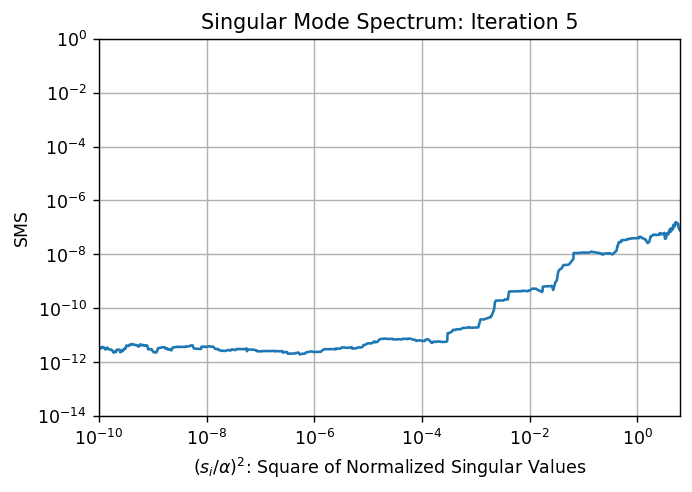

	Running iteration 6/20.


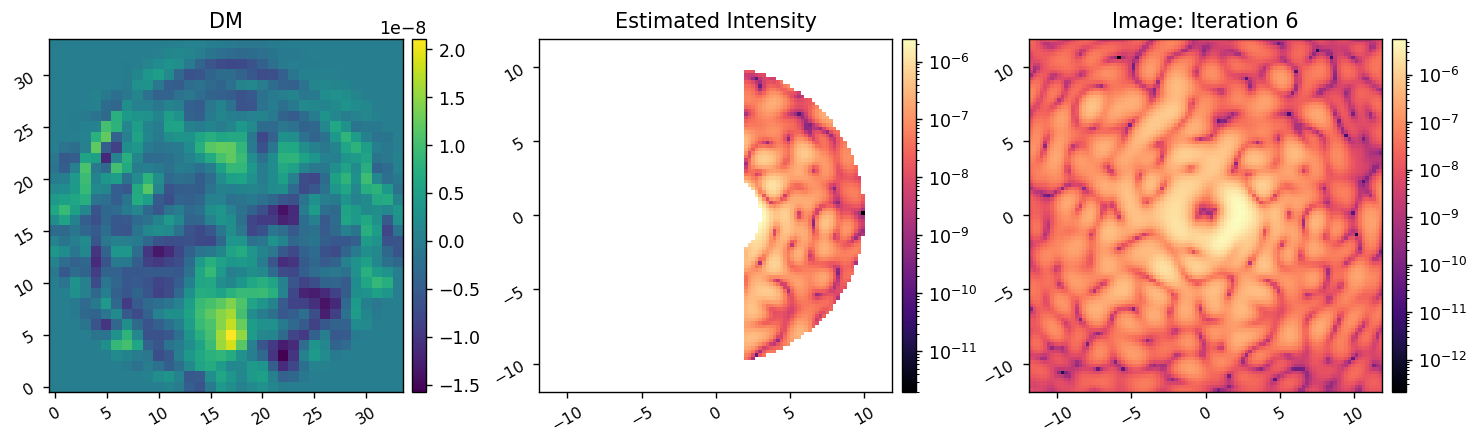

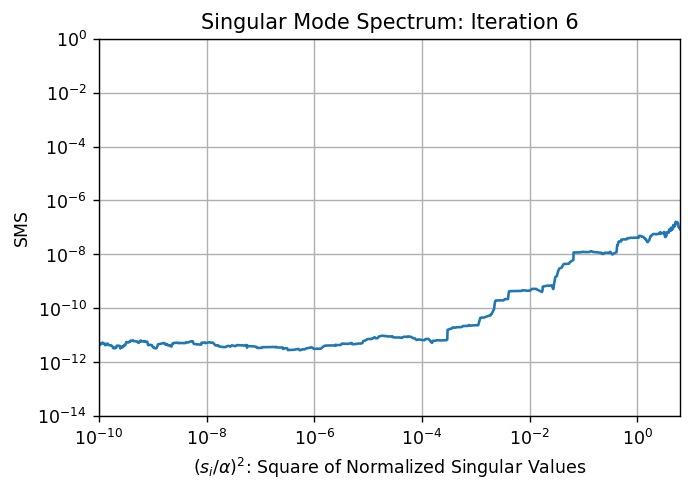

	Running iteration 7/20.


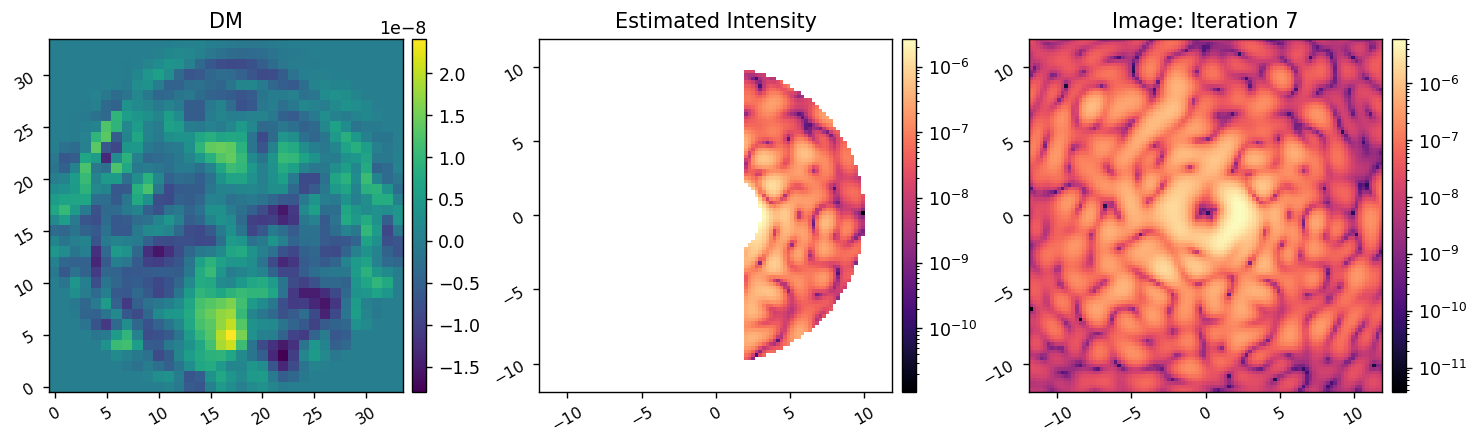

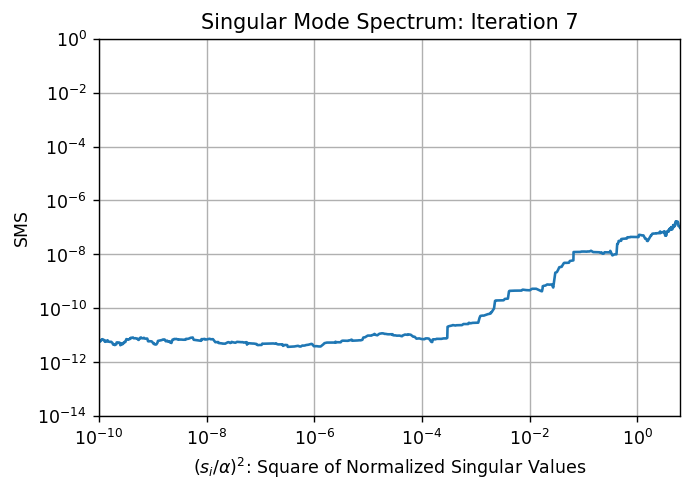

	Running iteration 8/20.


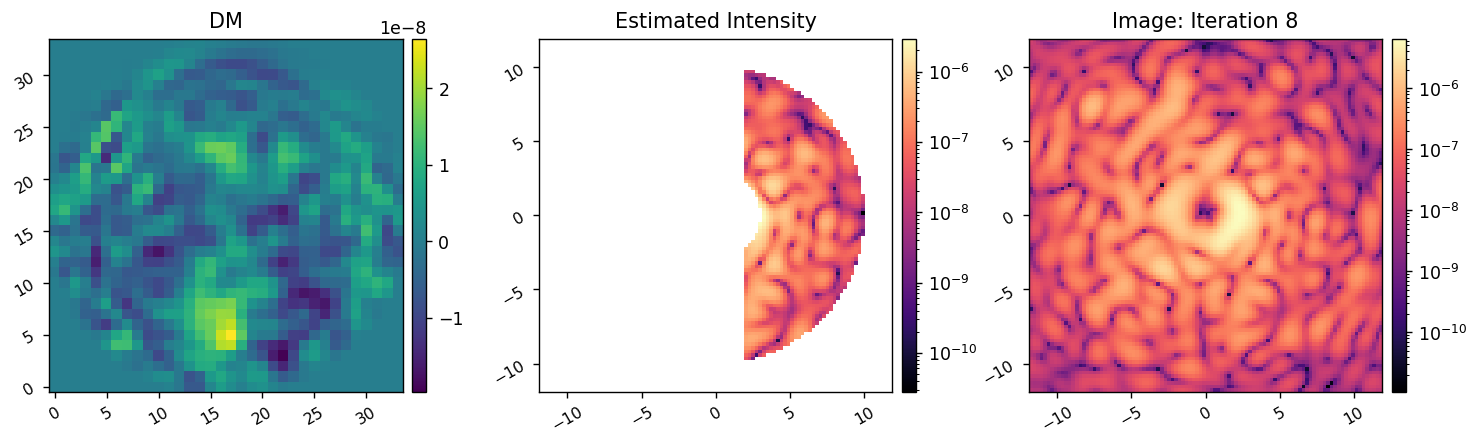

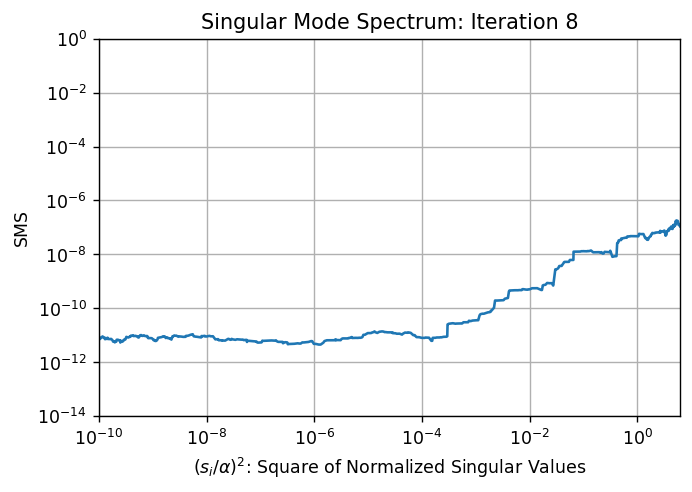

	Running iteration 9/20.


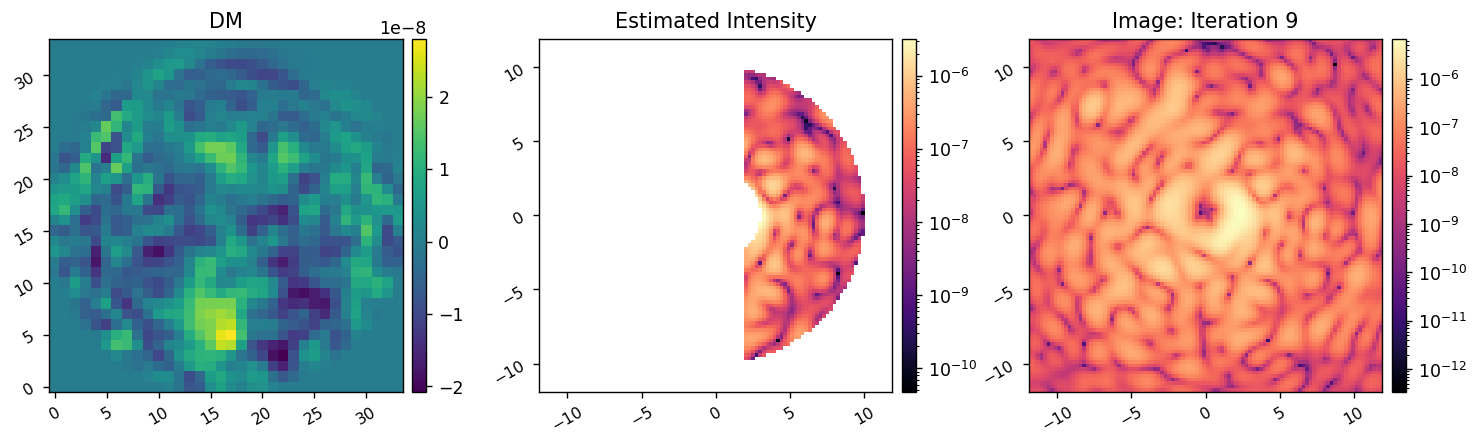

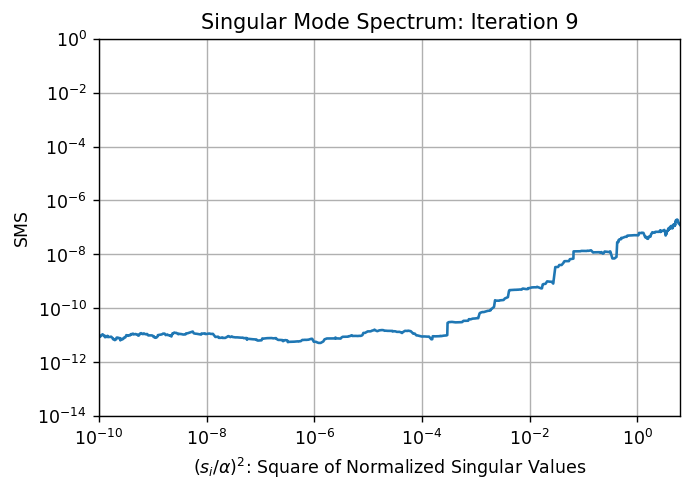

	Running iteration 10/20.


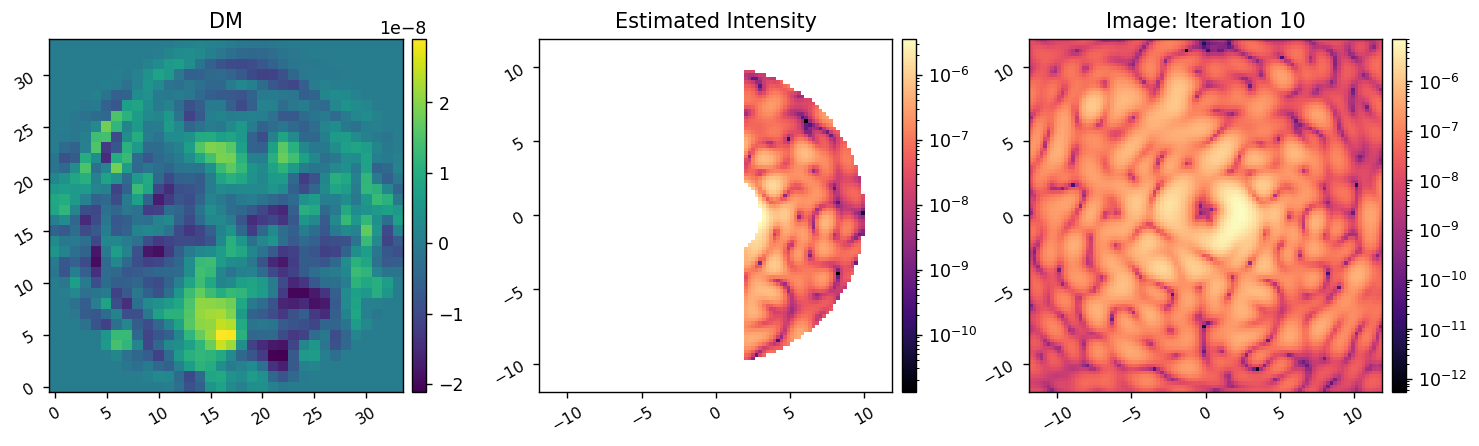

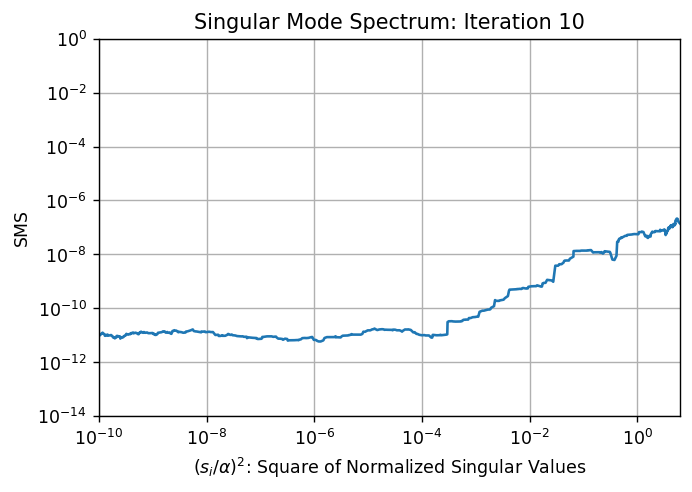

	Running iteration 11/20.


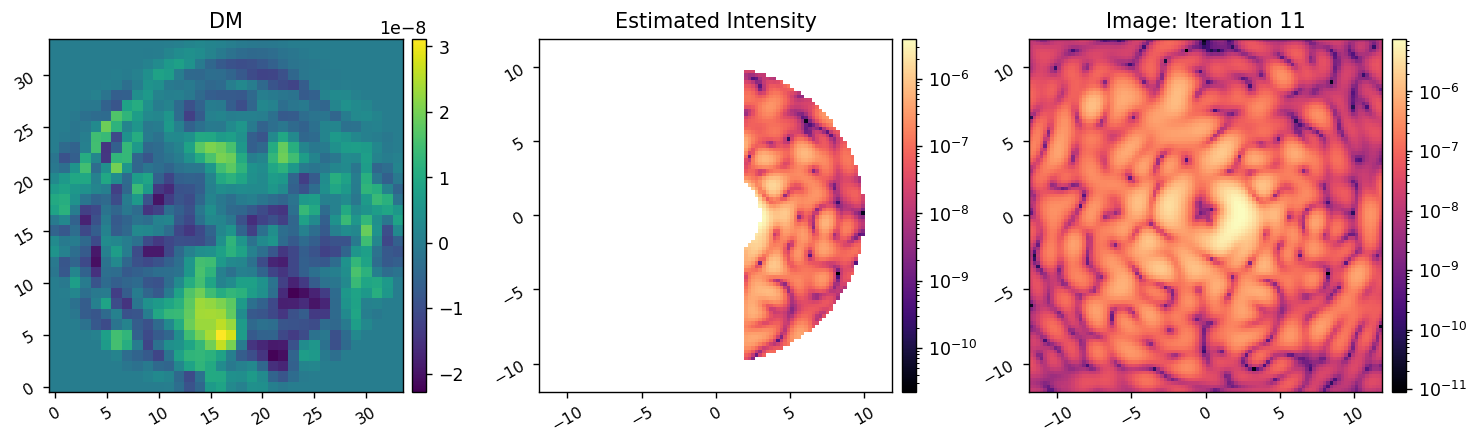

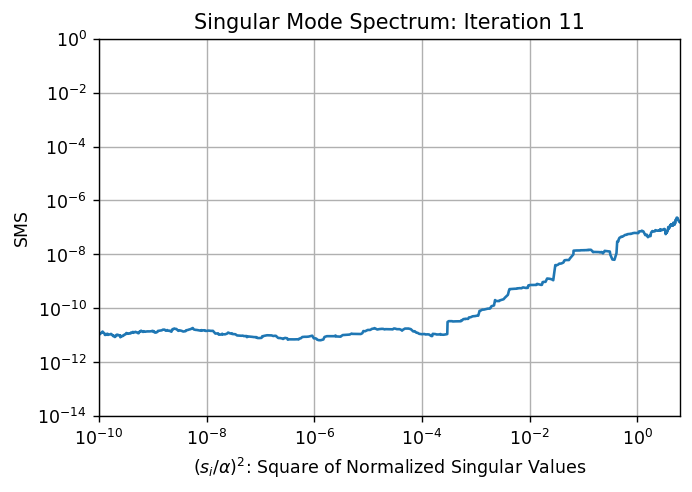

	Running iteration 12/20.


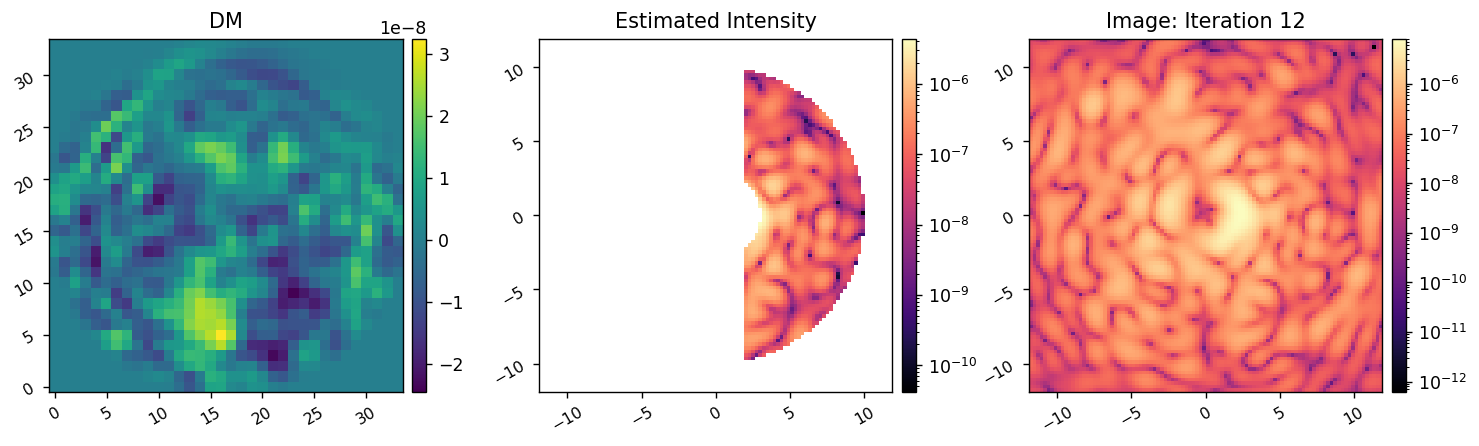

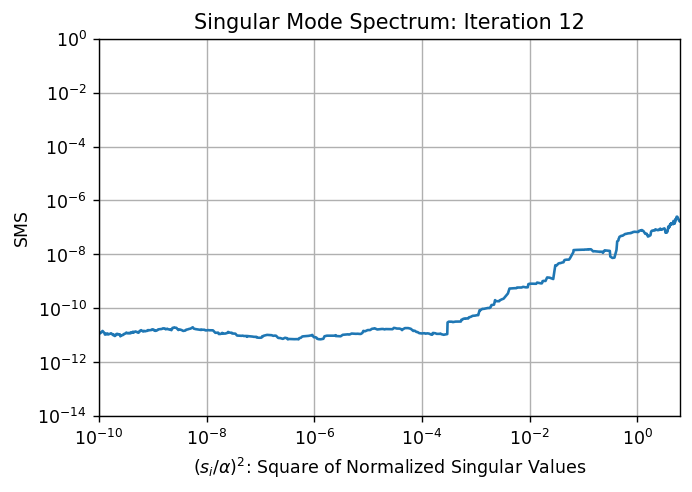

	Running iteration 13/20.


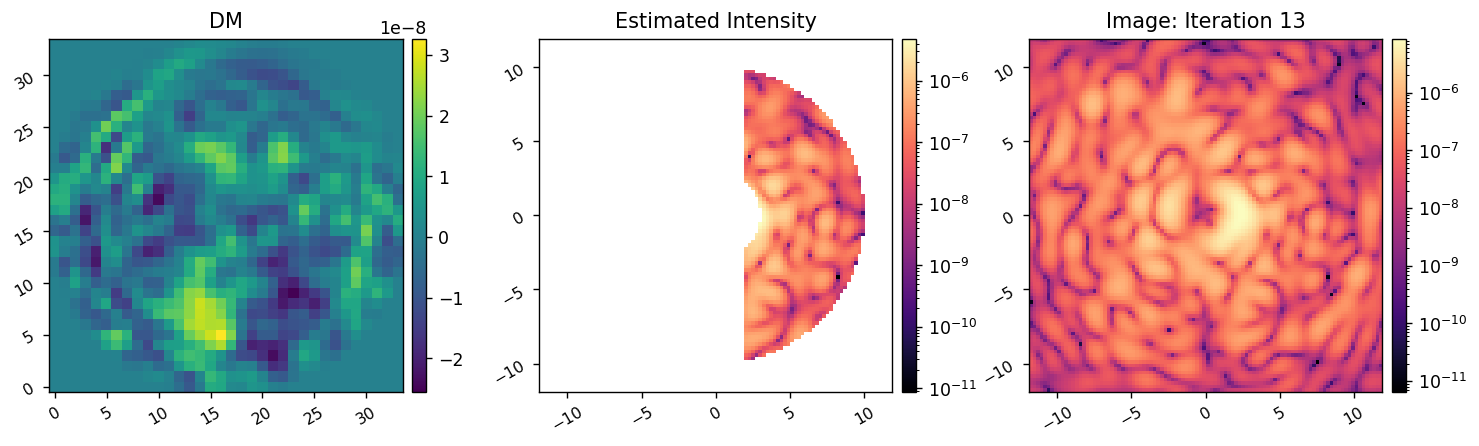

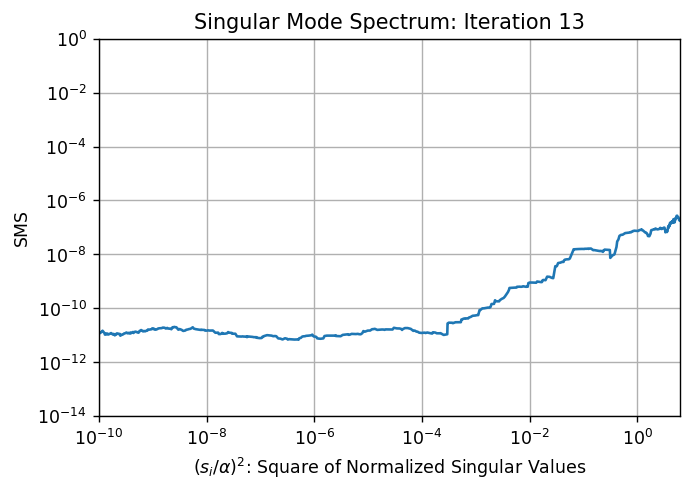

	Running iteration 14/20.


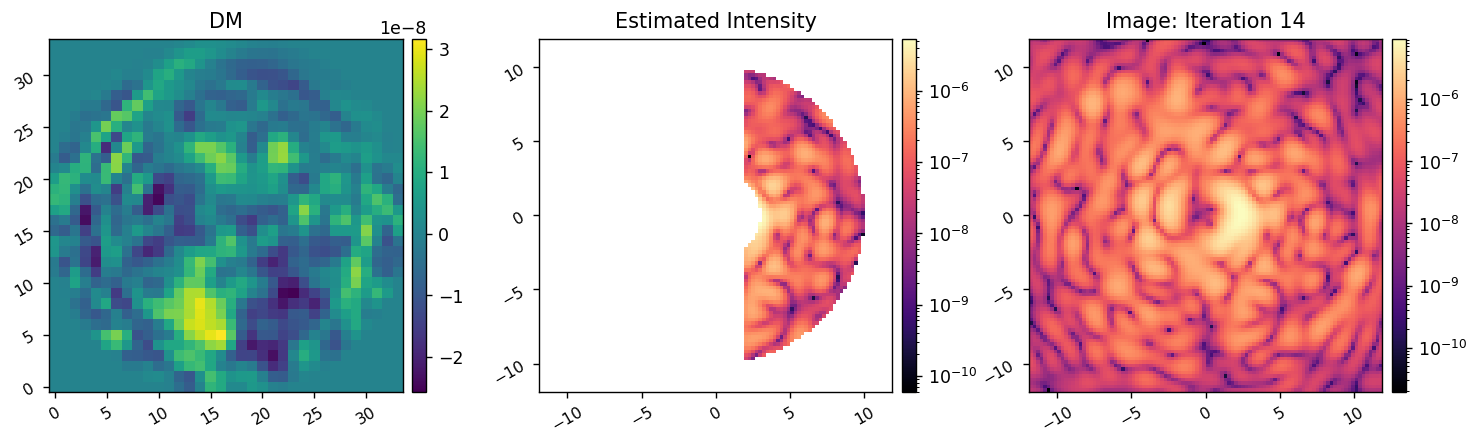

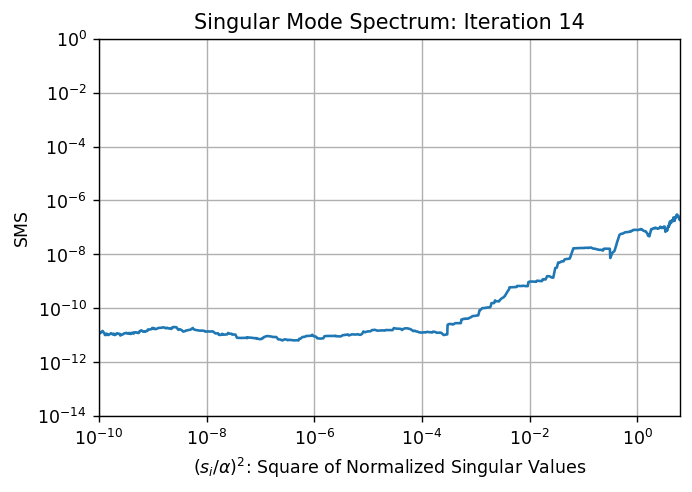

	Running iteration 15/20.


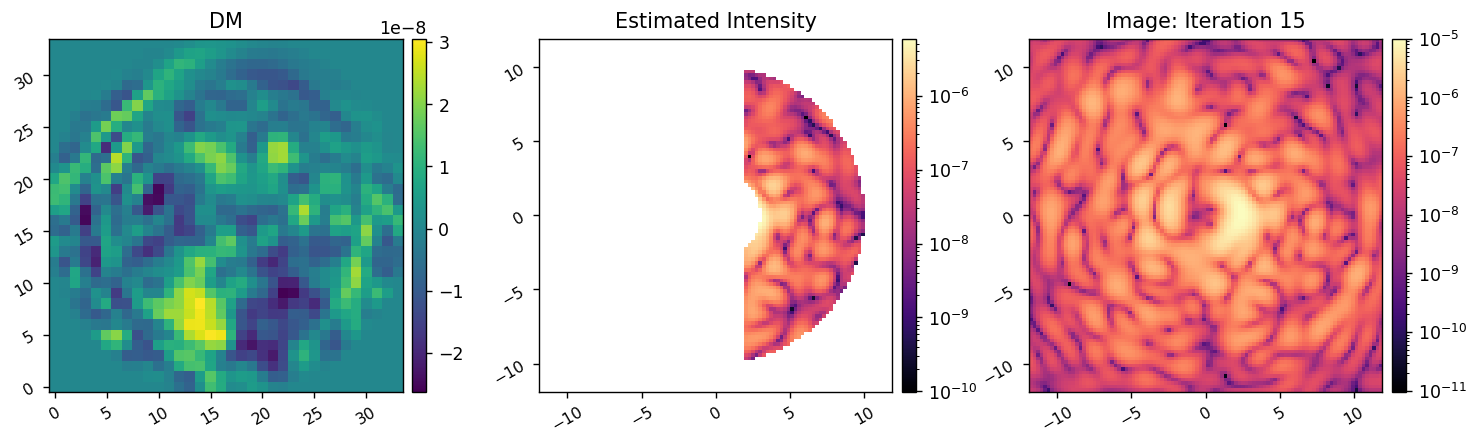

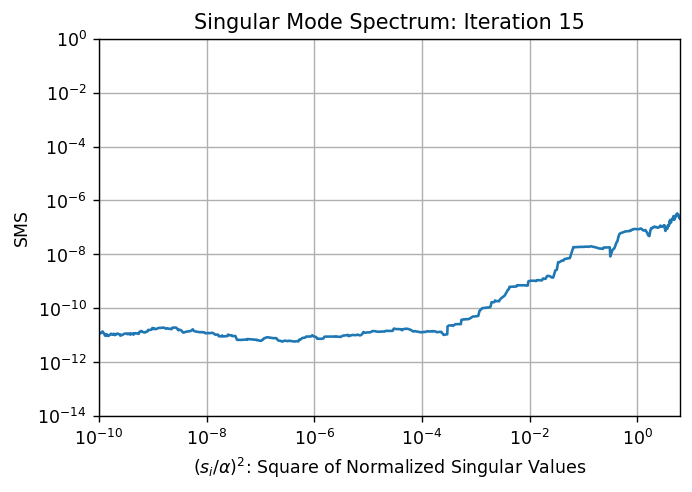

	Running iteration 16/20.


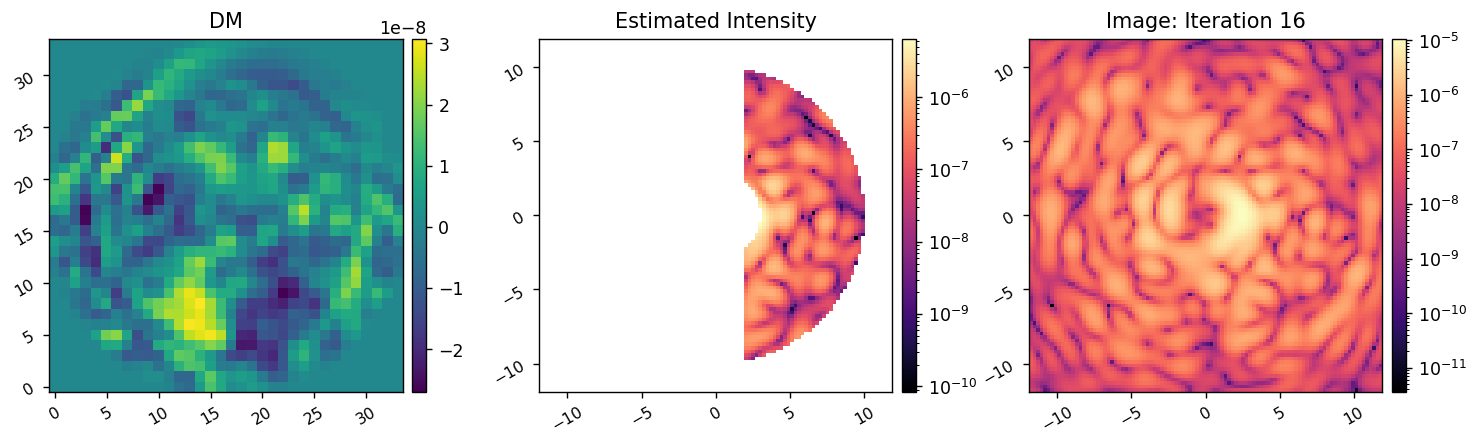

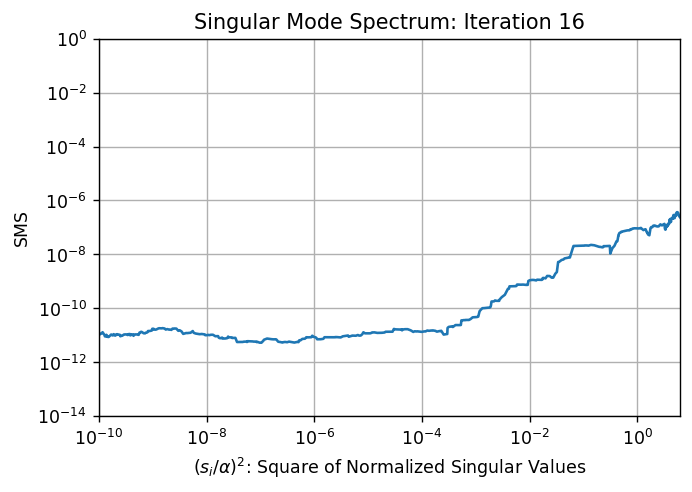

	Running iteration 17/20.


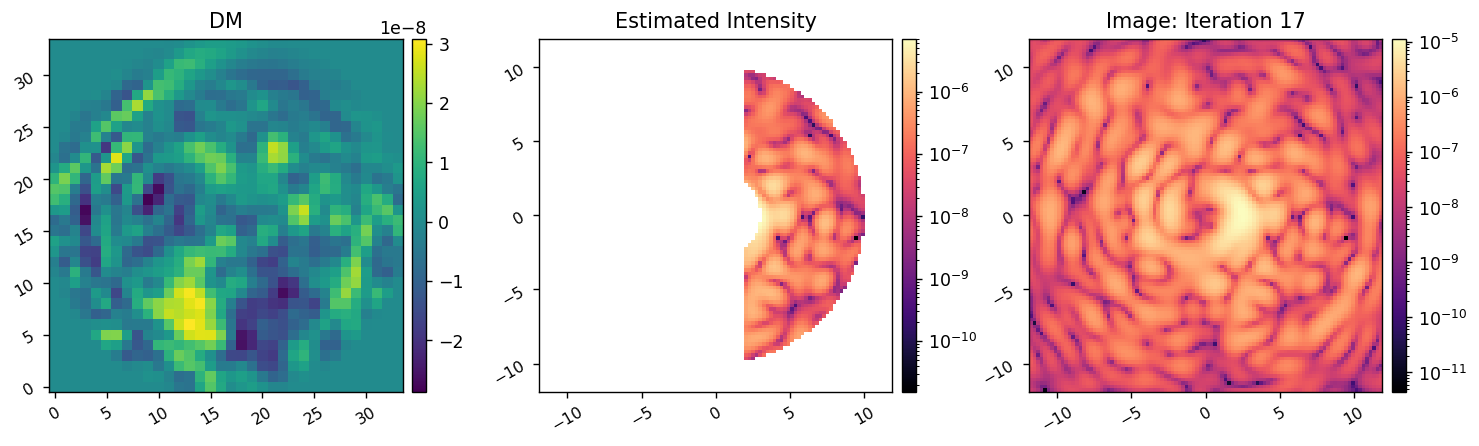

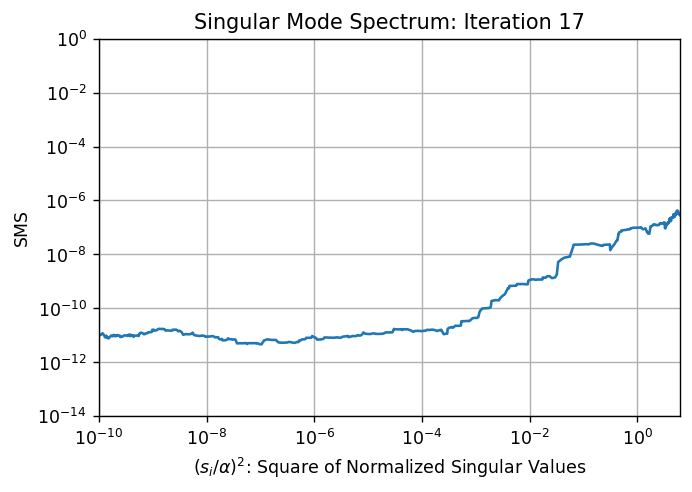

	Running iteration 18/20.


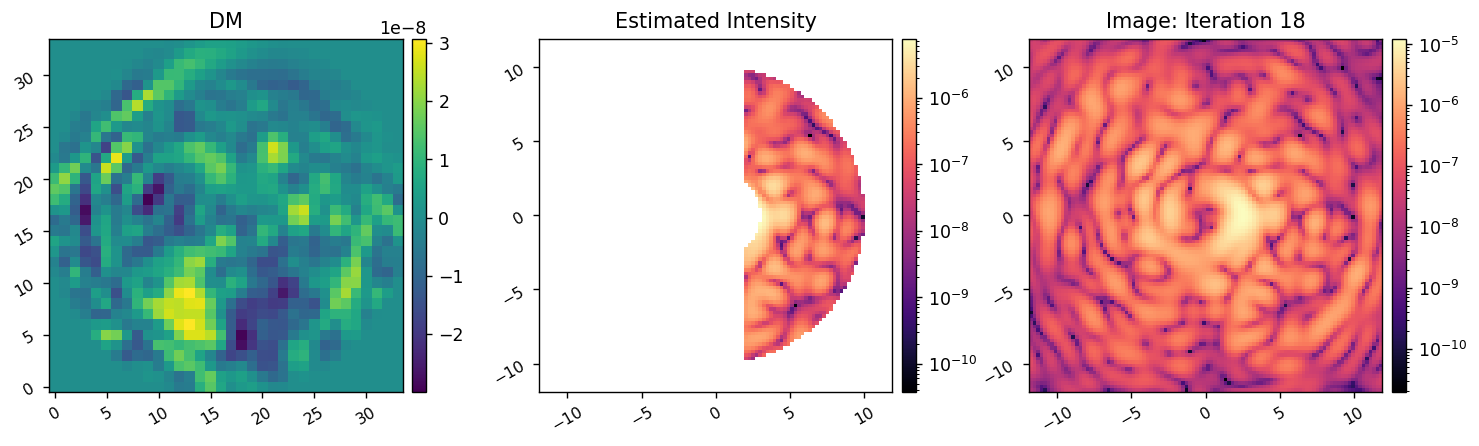

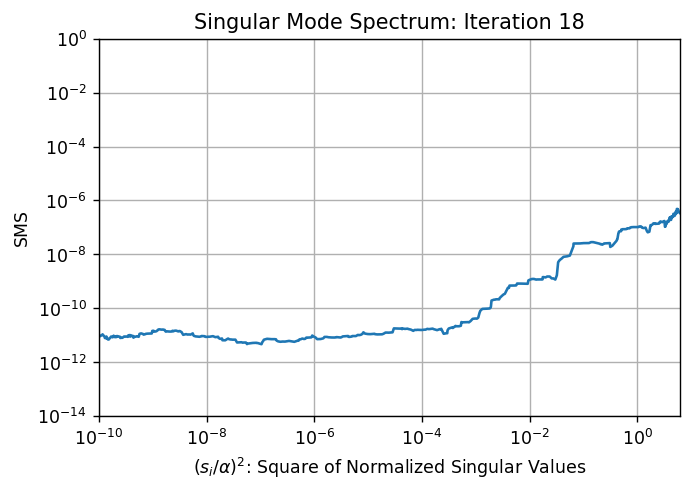

	Running iteration 19/20.


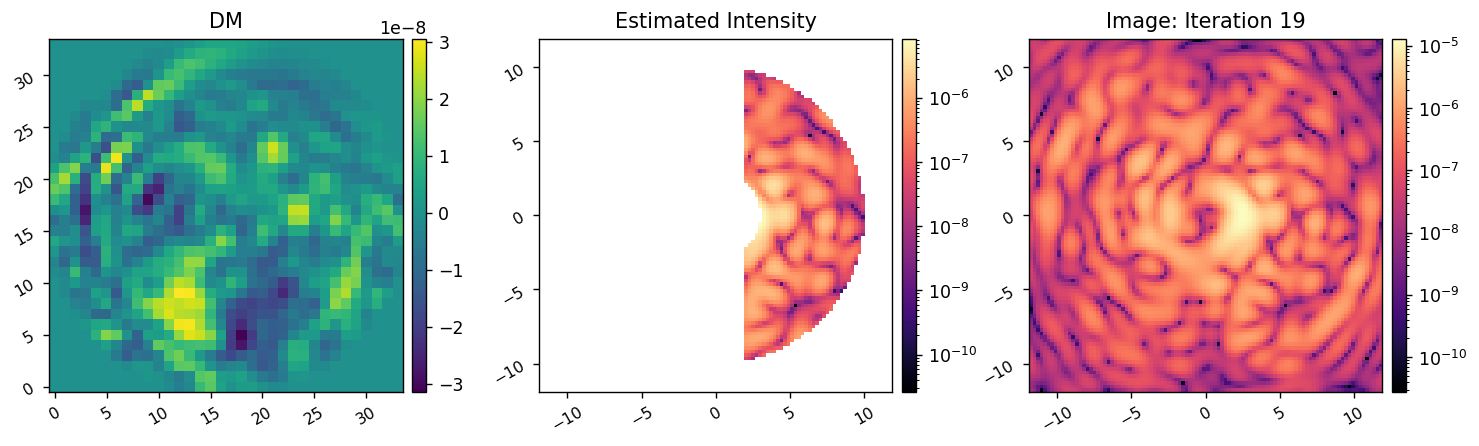

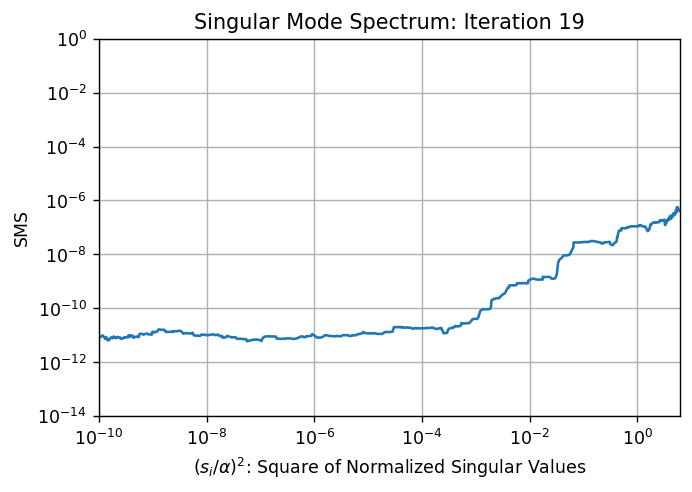

	Running iteration 20/20.


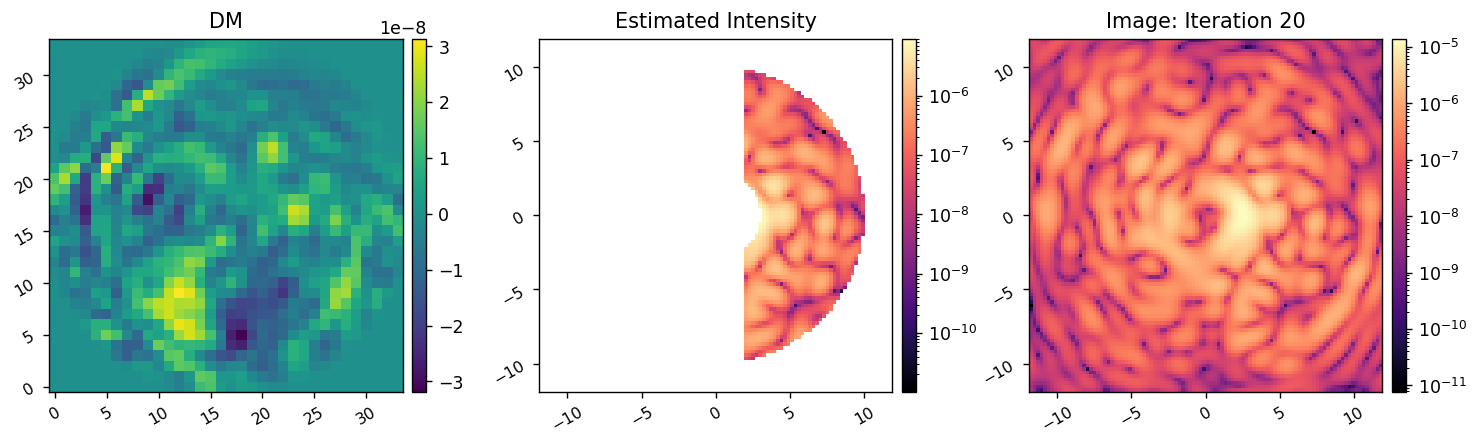

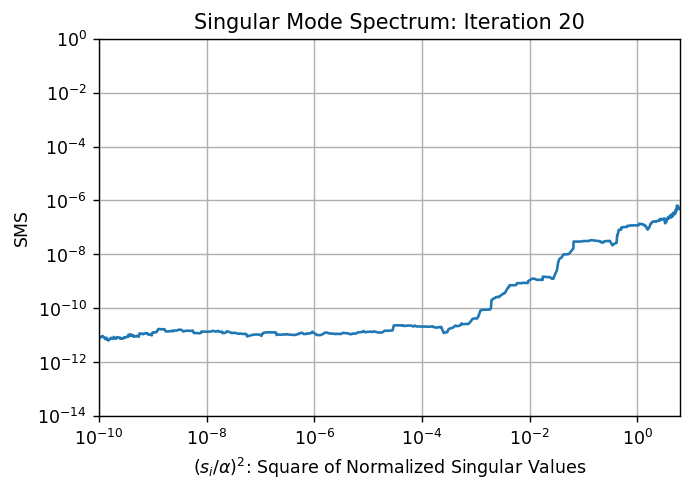

EFC completed in 75.993 sec.


In [45]:
reload(efc)

commands, efields, images = efc.run_efc_pwp(c,
                                            pwp_fun,
                                            pwp_kwargs,
                                            jac,
                                            reg_fun,
                                            reg_conds,
                                            dark_mask, 
                                            im_unocc.max(),
                                            iterations=20, 
                                            display_current=True, 
                                            display_all=True,
                                            plot_sms=True)

In [45]:

misc.save_fits('images\coro_image.fits', np.abs(efields[-1])**2, header={'PIXELSCL':c.psf_pixelscale_lamD,
                                                                         'ITRATION':20})
misc.save_fits('commands\efc_commands.fits', commands[-1][c.dm_mask], header={'ITRATION':20})

Saved data to:  images\coro_image.fits
Saved data to:  commands\efc_commands.fits
